In [30]:
%matplotlib inline
import numpy as np
from pmb_scipy import pmbsolve
from scipy.optimize import minimize

The logistic regression objective function and its derivative. Regularization included.

In [29]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def logreg(theta, *args):
    # args = (X,y,lambda)
    m = args[0].shape[0]  # number of instances
    lam = args[2] # regularization parameter
    z = np.dot(args[0],theta)
    J = sum(z + np.log(1+np.exp(-z))) - np.dot(z,args[1])
    J += 0.5*lam*np.dot(theta[1:],theta[1:])
    return J/m

def logreg_deriv(theta, *args):
    # args = (X,y,lambda)
    lam = args[2] # regularization parameter
    z = np.dot(args[0],theta)
    grad = np.dot(args[0].transpose(), 1/(1+np.exp(-z)) - y)
    grad[1:] += lam * theta[1:] # NB: regularization is not applied to the bias term
    return grad/args[0].shape[0]

MNIST training data set in CSV form

In [15]:
train = np.loadtxt("data/mnist_train.csv",delimiter=",")

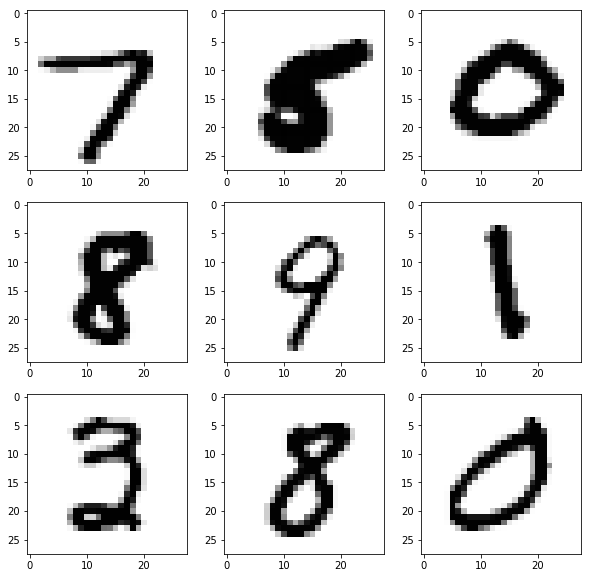

In [17]:
plt.figure(figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    row = np.random.randint(0,60001)
    plt.imshow(train[row,1:].reshape((28,28)),cmap="Greys")

The digit value to learn:

In [ ]:
value = 5

Separate the data into the design matrix X and the target vector y.

In [16]:
X = np.copy(train)/train.max() # Normalize the data, otherwise the exp() overflows.
X[:,0] = np.ones(X.shape[0]) # Add the column of ones for the bias.

# y[i] is 1 if the digit equals the specified value, otherwise 0.
y = np.array([1 if target==value else 0 for target in train[:,0]])

m, n = X.shape
theta_0 = np.random.randn(n)

(60000, 785)

In [18]:
X = np.copy(data)
y = np.copy(data[:,0])
X[:,0] = np.ones(X.shape[0])

In [23]:
del data # save memory

Determine weight parameters by minimizing with PMB